In [1]:
import pandas as pd
import xlwings as xl
import matplotlib.pyplot as plt

In [42]:
googl = pd.read_csv('Datasets/google_stock_price.csv', squeeze=True)
googl

0        50.12
1        54.10
2        54.65
3        52.38
4        52.95
         ...  
3007    772.88
3008    771.07
3009    773.18
3010    771.61
3011    782.22
Name: Stock Price, Length: 3012, dtype: float64

In [43]:
change = list()

for i in range(0, (len(googl) - 1)):
    k = ((googl[i + 1] - googl[i])/googl[i + 1]) * 100
    change.append(k)


In [44]:
change.insert(0, 'NaN')

In [45]:
len(change)

3012

In [46]:
change_series = pd.Series(change)
change_series

0            NaN
1        7.35675
2         1.0064
3       -4.33372
4        1.07649
          ...   
3007     0.52919
3008   -0.234739
3009    0.272899
3010   -0.203471
3011      1.3564
Length: 3012, dtype: object

In [47]:
df = pd.DataFrame(googl)
df['%Change'] = change_series
df

,Stock Price,%Change
0,50.12,NaN
1,54.10,7.35675
2,54.65,1.0064
3,52.38,-4.33372
4,52.95,1.07649
...,...,...
3007,772.88,0.52919
3008,771.07,-0.234739
3009,773.18,0.272899
3010,771.61,-0.203471


In [48]:
df['%Change'][0] = 0
df

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Stock Price,%Change
0,50.12,0
1,54.10,7.35675
2,54.65,1.0064
3,52.38,-4.33372
4,52.95,1.07649
...,...,...
3007,772.88,0.52919
3008,771.07,-0.234739
3009,773.18,0.272899
3010,771.61,-0.203471


In [49]:
df['%Change'].std()

1.9765094990517569

In [50]:
df['%Change'].tail(50).std()

1.114766252133188

In [52]:
for i in range(1, (len(df['%Change']))):
    df['%Change'][i] = df['%Change'][i].round(3)
    
df

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Stock Price,%Change
0,50.12,0
1,54.10,7.357
2,54.65,1.006
3,52.38,-4.334
4,52.95,1.076
...,...,...
3007,772.88,0.529
3008,771.07,-0.235
3009,773.18,0.273
3010,771.61,-0.203


In [53]:
df['%Change'].kurtosis()

8.216496589931538

In [54]:
df['%Change'].mode()

0    0
dtype: object

In [55]:
df['%Change'].median()

0.0495

In [63]:
df['%Change'].astype('float').idxmax()

922

In [64]:
df['%Change'][922]

16.66

In [23]:
pd.read_excel('Datasets/experiment.xlsx', sheet_name='Brent')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,Price,Open,High,Low,NaN,NaN,Date,Price,Open,High,Low
2,2019-11-18 00:00:00,62.24,63.32,63.54,61.95,NaN,NaN,2020-11-19 00:00:00,62.24,59.47,63.64,59.41
3,2019-11-15 00:00:00,63.3,62.47,63.65,61.7,NaN,NaN,2020-10-19 00:00:00,60.23,59.38,62.34,56.15
4,2019-11-14 00:00:00,62.28,62.61,63.21,62.15,NaN,NaN,2020-09-19 00:00:00,60.78,58.8,71.95,57.23
...,...,...,...,...,...,...,...,...,...,...,...,...
1288,2014-11-21 00:00:00,80.36,79.95,81.61,79.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289,2014-11-20 00:00:00,79.33,78.16,79.95,77.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1290,2014-11-19 00:00:00,78.1,78.41,79.45,78.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1291,2014-11-18 00:00:00,78.47,79.01,79.95,78.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
book = xl.Book('Datasets/experiment.xlsx')

In [3]:
brent = book.sheets('Brent')

In [30]:
brent.range('A3:E1294').options(pd.DataFrame, header=1).value

,Price,Open,High,Low
Date,,,,
2019-11-18,62.24,63.32,63.54,61.95
2019-11-15,63.30,62.47,63.65,61.70
2019-11-14,62.28,62.61,63.21,62.15
2019-11-13,62.37,61.85,62.74,61.22
2019-11-12,62.06,62.11,62.85,61.82
...,...,...,...,...
2014-11-21,80.36,79.95,81.61,79.07
2014-11-20,79.33,78.16,79.95,77.56
2014-11-19,78.10,78.41,79.45,78.04


In [4]:
brent_m1 = brent.range('H3:L63').options(pd.DataFrame, index=False).value

In [5]:
brent_m1['Date'].astype('str').str.replace('2020-', '01-')

0     01-11-19
1     01-10-19
2     01-09-19
3     01-08-19
4     01-07-19
5     01-06-19
6     01-05-19
7     01-04-19
8     01-03-19
9     01-02-19
10    01-01-19
11    01-12-18
12    01-11-18
13    01-10-18
14    01-09-18
15    01-08-18
16    01-07-18
17    01-06-18
18    01-05-18
19    01-04-18
20    01-03-18
21    01-02-18
22    01-01-18
23    01-12-17
24    01-11-17
25    01-10-17
26    01-09-17
27    01-08-17
28    01-07-17
29    01-06-17
30    01-05-17
31    01-04-17
32    01-03-17
33    01-02-17
34    01-01-17
35    01-12-16
36    01-11-16
37    01-10-16
38    01-09-16
39    01-08-16
40    01-07-16
41    01-06-16
42    01-05-16
43    01-04-16
44    01-03-16
45    01-02-16
46    01-01-16
47    01-12-15
48    01-11-15
49    01-10-15
50    01-09-15
51    01-08-15
52    01-07-15
53    01-06-15
54    01-05-15
55    01-04-15
56    01-03-15
57    01-02-15
58    01-01-15
59    01-12-14
Name: Date, dtype: object

In [6]:
brent_m1['Date'] = brent_m1['Date'].astype('str').str.replace('2020-', '01-')

In [105]:
brent_m1

,Date,Price,Open,High,Low
0,01-11-19,62.24,59.47,63.64,59.41
1,01-10-19,60.23,59.38,62.34,56.15
2,01-09-19,60.78,58.80,71.95,57.23
3,01-08-19,60.43,64.09,64.54,55.88
4,01-07-19,65.17,65.05,67.65,61.29
5,01-06-19,66.55,61.64,66.85,59.45
6,01-05-19,64.49,71.73,73.40,64.37
7,01-04-19,72.80,67.58,75.60,67.58
8,01-03-19,68.39,66.48,68.89,64.02
9,01-02-19,66.03,61.06,67.73,60.46


In [7]:
brent_m1['Date'] = pd.to_datetime(brent_m1['Date'], dayfirst=True)

In [9]:
brent_m1.set_index(keys='Date', inplace=True)

# Playing with .rolling() method

In [17]:
kilo = brent_m1['Price'].sort_index()

In [28]:
def percentage(l):
    x = l[0]
    y = l[1]
    k = ((y - x)/y) * 100
    return k

In [ ]:
per_change = kilo.rolling(2).apply(percentage, raw=True)
brent_m1.insert(4, column='%change', value=per_change)
brent_m1

# Negative Graphing

In [2]:
fx = {'GBPUSD': 0.03,
      'USDCHF': 0.02,
      'USDNOK': -0.04,
      'USDZAR': -0.05}

In [4]:
fxSeries = pd.Series(fx)

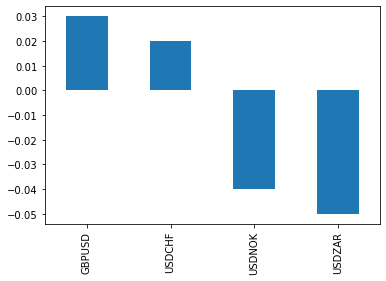

In [6]:
fxSeries.plot(kind='bar')
plt.show()